In [133]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt

master1=pd.read_excel('master_data.xlsx')
master=master1
#파일에 '펀딩마감날짜' - '펀딩시작날짜'= '펀딩기간(일)' 이라는 컬럼 추가됨.

In [134]:
#펀딩시작요일 원핫인코딩 필요
from sklearn.preprocessing import LabelBinarizer
day = pd.get_dummies(master.펀딩시작요일)
master=pd.concat([master,day], axis=1)

In [135]:
# 펀딩시작월 전처리(연도상관없이 월만 인덱싱, 원핫인코딩)
month=[]
for i in range(len(master.iloc[:,1])):
    month.append(master.펀딩시작월[i][-2:])


In [136]:
months = pd.get_dummies(pd.Series(month))
master=pd.concat([master,months], axis=1)
master.head()

,Unnamed: 0,Unnamed: 0.1,url,메이커,펀딩시작날짜,펀딩마감날짜,펀딩기간(일),펀딩시작요일,목표금액,서포터수,...,03,04,05,06,07,08,09,10,11,12
0,0,0,https://www.wadiz.kr/web/campaign/detail/38364,해아래천일염(나진솔트),2019-06-27,2019-07-31,34,Thu,3500000,13,...,0,0,0,1,0,0,0,0,0,0
1,1,1,https://www.wadiz.kr/web/campaign/detail/35753,케이알엑스 (주),2019-06-27,2019-07-30,33,Thu,1000000,9,...,0,0,0,1,0,0,0,0,0,0
2,2,2,https://www.wadiz.kr/web/campaign/detail/38045,인플레오,2019-06-27,2019-07-21,24,Thu,1000000,240,...,0,0,0,1,0,0,0,0,0,0
3,3,3,https://www.wadiz.kr/web/campaign/detail/37542,생활한방연구소,2019-06-27,2019-07-18,21,Thu,500000,142,...,0,0,0,1,0,0,0,0,0,0
4,4,4,https://www.wadiz.kr/web/campaign/detail/36971,농업회사법인(주)영덕주조,2019-06-27,2019-07-17,20,Thu,1000000,365,...,0,0,0,1,0,0,0,0,0,0


In [137]:
master.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'url', '메이커', '펀딩시작날짜', '펀딩마감날짜',
       '펀딩기간(일)', '펀딩시작요일', '목표금액', '서포터수', '좋아요수', '글업데이트수', '댓글수', '리워드종류수',
       '이미지수', '비디오수', '배송시작날짜', '마감배송차이', '인스타존재여부', '인스타팔로워수', '와디즈팔로워수',
       '과거프로젝트수', '과거성공프로젝트수', '앵콜펀딩여부', '음절수', '단어수', '문장수', 'Strong',
       'Under', '가독성', '가독성2', '제목단어수', '펀딩성공여부', '달성률', '펀딩시작월', '소비자물가',
       '근원물가', '생활물가', '실질GDP성장률', '제목', '달성액', '요약글', '카테고리', '디자인소품', '반려동물',
       '뷰티', '스포츠·모빌리티', '여행·레저', '테크·가전', '패션·잡화', '푸드', '홈리빙', '분기',
       '와디즈기사개수', '크라우드펀딩기사개수', 'PER', 'PBR', 'ROE', 'EBIT', 'Fri', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '01', '02', '03', '04', '05', '06',
       '07', '08', '09', '10', '11', '12'],
      dtype='object')

In [243]:
features_=master.drop(['펀딩시작월','펀딩시작요일','과거프로젝트수','단어수','소비자물가',\
                       '음절수','펀딩시작날짜','펀딩마감날짜','제목','요약글',\
                       'Unnamed: 0','Unnamed: 0.1','url', '메이커', '좋아요수',\
                       '댓글수', '서포터수','카테고리', '분기','배송시작날짜',\
                       '달성액'], axis=1)

In [144]:
features_=features_.drop(['달성률'],axis=1)

In [145]:
target_=master['달성률']

# 스케일링과 분석모형 다양화(LR, L1 , L2,엘라스틱) 시도
## 1. 데이터 보존
1) Robust Scaler (정규분포화, 이상치영향감소)
2) np.log(x) +1 변형 실시(왜도 감소, 정규분포화, 이상치영향감소)

## 2. 데이터 삭제 - '달성률' 이상치 (0과 iqr>\5\, std>\3\)
1) 시각화 및 바로 회귀분석
2) Robust Scaler
3) np.log(x) +1 변형 실시

## 3. Feature 이상치 제거(문제발생 가능성 0)

# 1-1) Robust Scale화 실시, 회귀분석.

In [212]:
import sklearn.model_selection as ms
from sklearn.preprocessing import RobustScaler

X_train, X_test, y_train, y_test = \
ms.train_test_split(features_, target_, test_size=0.3, random_state=42)

# feature 데이터(masterf)에 robust scaling 실시
from sklearn.preprocessing import RobustScaler
Rs_Xtrain=RobustScaler().fit_transform(X_train)
Rs_Xtest=RobustScaler().fit_transform(X_test)
Rs_ytrain=np.squeeze(RobustScaler().fit_transform(y_train.values.reshape(-1,1)))
Rs_ytest=np.squeeze(RobustScaler().fit_transform(y_test.values.reshape(-1,1)))


#Rs_Xtrain_cleaned=Rs_Xtrain[Rs_Xtrain<5]
#Rs_Xtest_cleaned=Rs_Xtest[Rs_Xtest<5]
#Rs_ytrain_cleaned=Rs_ytrain[Rs_ytrain<5]
#Rs_ytest_cleaned=Rs_ytest[Rs_ytest<5]

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(Rs_Xtrain)
plt.show()

In [225]:
#다중선형회귀 실시
import sklearn.linear_model as lm
import sklearn.metrics as mt
import numpy as np

reg=lm.LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)

reg_scaled=lm.LinearRegression().fit(Rs_Xtrain ,Rs_ytrain)
y_pred_scaled = reg_scaled.predict(Rs_Xtest)
r2_scaled = mt.r2_score(Rs_ytest, y_pred_scaled)

#오차 및 결정계수
mse = mt.mean_squared_error(y_test, y_pred) # 테스트예측값
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test, y_pred)

print('MSE: {:3f}\nRMSE: {:.3f}\nR2: {:.3f}'.format(mse, rmse, r2))
#수정결정계수
n = len(X_train)
k = len(X_train.columns)

adj_r2 = 1 - ((1-r2)*(n-1) / (n-k-1))
adj_r2_scaled = 1 - ((1-r2_scaled)*(n-1) / (n-k-1))
print('-'*10)
print('선형회귀 Adjusted R2: {:.4f}'.format(adj_r2))
print('선형회귀 Scaled_Adjusted R2: {:.4f}'.format(adj_r2_scaled))
print('-'*10)
print('선형회귀 Scale데이터모형 향상도: {:.4f}'.format(adj_r2_scaled-adj_r2))
#coefs = pd.Series(data=np.round(reg.coef_,3),index=features_.columns)
#coefs_sort = coefs.sort_values(ascending=False)
#print(coefs_sort)
#print('절편:', round(reg.intercept_, 3))
#np.set_printoptions(suppress=False)

MSE: 2923006.636101
RMSE: 1709.680
R2: 0.251
----------
Adjusted R2: 0.2398
Scaled_Adjusted R2: 0.2311
----------
Scale데이터모형 향상도: -0.0087


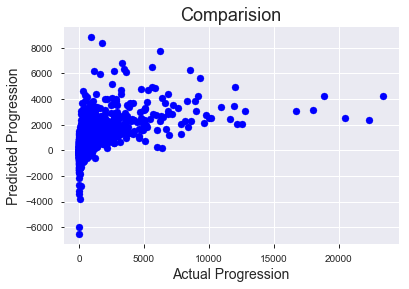

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred, color ='b')
plt.xlabel('Actual Progression',fontsize=14)
plt.ylabel('Predicted Progression',fontsize=14)
plt.title('Comparision',fontsize=18)
plt.show() 

In [226]:
#릿지 회귀 실시
ridge=lm.Ridge(alpha = 0.01)
reg=ridge.fit(X_train,y_train)
y_pred = reg.predict(X_test)

ridge=lm.Ridge(alpha = 0.01)
reg_scaled=ridge.fit(Rs_Xtrain ,Rs_ytrain)
y_pred_scaled = reg_scaled.predict(Rs_Xtest)

r2=mt.r2_score(y_test,y_pred)
r2_scaled = mt.r2_score(Rs_ytest, y_pred_scaled) #정답, 예측값 순서
print('릿지회귀 R2: {:.4f}'.format(r2))
print('릿지회귀 Adjusted R2: {:.4f}'.format(adj_r2))
print('릿지회귀 Scaled_Adjusted R2: {:.4f}'.format(adj_r2_scaled))
print('릿지회귀 Scale데이터모형 향상도: {:.4f}'.format(adj_r2_scaled-adj_r2))


릿지회귀 R2: 0.2513
릿지회귀 Adjusted R2: 0.2398
릿지회귀 Scaled_Adjusted R2: 0.2311
릿지회귀 Scale데이터모형 향상도: -0.0087


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.45552e-19): result may not be accurate.
  overwrite_a=True).T


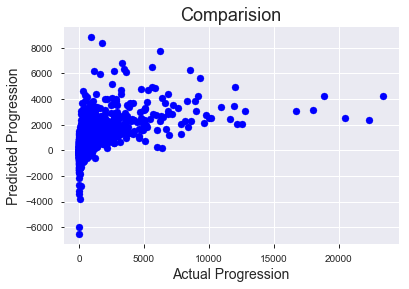

In [228]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred, color ='b')
plt.xlabel('Actual Progression',fontsize=14)
plt.ylabel('Predicted Progression',fontsize=14)
plt.title('Comparision',fontsize=18)
plt.show() 

In [234]:
#라쏘 회귀 실시
lasso=lm.Lasso(alpha = 0.1)
reg=ridge.fit(X_train,y_train)
y_pred = reg.predict(X_test)

lasso_scaled=lm.Lasso(alpha = 0.01)
reg_scaled=ridge.fit(Rs_Xtrain ,Rs_ytrain)
y_pred_scaled = reg_scaled.predict(Rs_Xtest)

r2=mt.r2_score(y_test,y_pred)
r2_scaled = mt.r2_score(Rs_ytest, y_pred_scaled) #정답, 예측값 순서
print('릿지회귀 R2: {:.4f}'.format(r2))
print('릿지회귀 Adjusted R2: {:.4f}'.format(adj_r2))
print('릿지회귀 Scaled_Adjusted R2: {:.4f}'.format(adj_r2_scaled))
print('릿지회귀 Scale데이터모형 향상도: {:.4f}'.format(adj_r2_scaled-adj_r2))


릿지회귀 R2: 0.2513
릿지회귀 Adjusted R2: 0.2398
릿지회귀 Scaled_Adjusted R2: 0.2311
릿지회귀 Scale데이터모형 향상도: -0.0087


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.45552e-19): result may not be accurate.
  overwrite_a=True).T


In [242]:
#엘라스틱 회귀 실시
elastic = lm.ElasticNet(alpha = 0.01, l1_ratio=0.5)
reg=ridge.fit(X_train,y_train)
y_pred = reg.predict(X_test)

elastic_scaled = lm.ElasticNet(alpha = 0.01, l1_ratio=0.5)
reg_scaled=ridge.fit(Rs_Xtrain ,Rs_ytrain)
y_pred_scaled = reg_scaled.predict(Rs_Xtest)

r2=mt.r2_score(y_test,y_pred)
r2_scaled = mt.r2_score(Rs_ytest, y_pred_scaled) #정답, 예측값 순서
print('릿지회귀 R2: {:.4f}'.format(r2))
print('릿지회귀 Adjusted R2: {:.4f}'.format(adj_r2))
print('릿지회귀 Scaled_Adjusted R2: {:.4f}'.format(adj_r2_scaled))
print('릿지회귀 Scale데이터모형 향상도: {:.4f}'.format(adj_r2_scaled-adj_r2))


릿지회귀 R2: 0.2513
릿지회귀 Adjusted R2: 0.2398
릿지회귀 Scaled_Adjusted R2: 0.2311
릿지회귀 Scale데이터모형 향상도: -0.0087


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.45552e-19): result may not be accurate.
  overwrite_a=True).T


# 1-1)결론: Robust Scale 시도했으나, 여전히 모형, 변수 변화에도 심폐소생불가

# 그런데 원핫인코딩을 Robust해도될까..? 원핫인코딩컬럼 제외하고 다시해보자

In [253]:
ohe제거=features_.drop(['디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저', '테크·가전',
       '패션·잡화', '푸드', '홈리빙','Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '01', '02',
       '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], axis=1)

In [254]:
print(ohe제거.shape)
print(target_.shape)

(5302, 29)
(5302,)


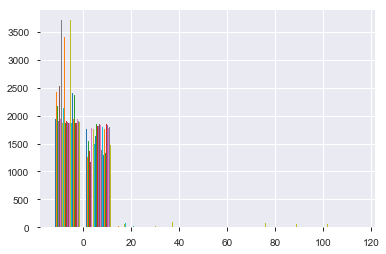

In [260]:
import sklearn.model_selection as ms
from sklearn.preprocessing import RobustScaler

X_train, X_test, y_train, y_test = \
ms.train_test_split(ohe제거, target_, test_size=0.3, random_state=42)

# feature 데이터(masterf)에 robust scaling 실시
from sklearn.preprocessing import RobustScaler
Rs_Xtrain=RobustScaler().fit_transform(X_train)
Rs_Xtest=RobustScaler().fit_transform(X_test)
Rs_ytrain=np.squeeze(RobustScaler().fit_transform(y_train.values.reshape(-1,1)))
Rs_ytest=np.squeeze(RobustScaler().fit_transform(y_test.values.reshape(-1,1)))


#Rs_Xtrain_cleaned=Rs_Xtrain[Rs_Xtrain<5]
#Rs_Xtest_cleaned=Rs_Xtest[Rs_Xtest<5]
#Rs_ytrain_cleaned=Rs_ytrain[Rs_ytrain<5]
#Rs_ytest_cleaned=Rs_ytest[Rs_ytest<5]

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(Rs_Xtrain)
plt.show()

In [261]:
#다중선형회귀 실시
import sklearn.linear_model as lm
import sklearn.metrics as mt
import numpy as np

reg=lm.LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)

reg_scaled=lm.LinearRegression().fit(Rs_Xtrain ,Rs_ytrain)
y_pred_scaled = reg_scaled.predict(Rs_Xtest)
r2_scaled = mt.r2_score(Rs_ytest, y_pred_scaled)

#오차 및 결정계수
mse = mt.mean_squared_error(y_test, y_pred) # 테스트예측값
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test, y_pred)

print('MSE: {:3f}\nRMSE: {:.3f}\nR2: {:.3f}'.format(mse, rmse, r2))
#수정결정계수
n = len(X_train)
k = len(X_train.columns)

adj_r2 = 1 - ((1-r2)*(n-1) / (n-k-1))
adj_r2_scaled = 1 - ((1-r2_scaled)*(n-1) / (n-k-1))
print('-'*10)
print('선형회귀 Adjusted R2: {:.4f}'.format(adj_r2))
print('선형회귀 Scaled_Adjusted R2: {:.4f}'.format(adj_r2_scaled))
print('-'*10)
print('선형회귀 Scale데이터모형 향상도: {:.4f}'.format(adj_r2_scaled-adj_r2))
#coefs = pd.Series(data=np.round(reg.coef_,3),index=features_.columns)
#coefs_sort = coefs.sort_values(ascending=False)
#print(coefs_sort)
#print('절편:', round(reg.intercept_, 3))
#np.set_printoptions(suppress=False)

MSE: 0.000000
RMSE: 0.000
R2: 1.000
----------
선형회귀 Adjusted R2: 1.0000
선형회귀 Scaled_Adjusted R2: 1.0000
----------
선형회귀 Scale데이터모형 향상도: 0.0000


In [262]:
#릿지 회귀 실시
ridge=lm.Ridge(alpha = 0.01)
reg=ridge.fit(X_train,y_train)
y_pred = reg.predict(X_test)

ridge=lm.Ridge(alpha = 0.01)
reg_scaled=ridge.fit(Rs_Xtrain ,Rs_ytrain)
y_pred_scaled = reg_scaled.predict(Rs_Xtest)

r2=mt.r2_score(y_test,y_pred)
r2_scaled = mt.r2_score(Rs_ytest, y_pred_scaled) #정답, 예측값 순서
print('릿지회귀 R2: {:.4f}'.format(r2))
print('릿지회귀 Adjusted R2: {:.4f}'.format(adj_r2))
print('릿지회귀 Scaled_Adjusted R2: {:.4f}'.format(adj_r2_scaled))
print('릿지회귀 Scale데이터모형 향상도: {:.4f}'.format(adj_r2_scaled-adj_r2))


릿지회귀 R2: 1.0000
릿지회귀 Adjusted R2: 1.0000
릿지회귀 Scaled_Adjusted R2: 1.0000
릿지회귀 Scale데이터모형 향상도: 0.0000


In [263]:
#라쏘 회귀 실시
lasso=lm.Lasso(alpha = 0.1)
reg=ridge.fit(X_train,y_train)
y_pred = reg.predict(X_test)

lasso_scaled=lm.Lasso(alpha = 0.01)
reg_scaled=ridge.fit(Rs_Xtrain ,Rs_ytrain)
y_pred_scaled = reg_scaled.predict(Rs_Xtest)

r2=mt.r2_score(y_test,y_pred)
r2_scaled = mt.r2_score(Rs_ytest, y_pred_scaled) #정답, 예측값 순서
print('릿지회귀 R2: {:.4f}'.format(r2))
print('릿지회귀 Adjusted R2: {:.4f}'.format(adj_r2))
print('릿지회귀 Scaled_Adjusted R2: {:.4f}'.format(adj_r2_scaled))
print('릿지회귀 Scale데이터모형 향상도: {:.4f}'.format(adj_r2_scaled-adj_r2))


릿지회귀 R2: 1.0000
릿지회귀 Adjusted R2: 1.0000
릿지회귀 Scaled_Adjusted R2: 1.0000
릿지회귀 Scale데이터모형 향상도: 0.0000


In [264]:
#엘라스틱 회귀 실시
elastic = lm.ElasticNet(alpha = 0.01, l1_ratio=0.5)
reg=ridge.fit(X_train,y_train)
y_pred = reg.predict(X_test)

elastic_scaled = lm.ElasticNet(alpha = 0.01, l1_ratio=0.5)
reg_scaled=ridge.fit(Rs_Xtrain ,Rs_ytrain)
y_pred_scaled = reg_scaled.predict(Rs_Xtest)

r2=mt.r2_score(y_test,y_pred)
r2_scaled = mt.r2_score(Rs_ytest, y_pred_scaled) #정답, 예측값 순서
print('릿지회귀 R2: {:.4f}'.format(r2))
print('릿지회귀 Adjusted R2: {:.4f}'.format(adj_r2))
print('릿지회귀 Scaled_Adjusted R2: {:.4f}'.format(adj_r2_scaled))
print('릿지회귀 Scale데이터모형 향상도: {:.4f}'.format(adj_r2_scaled-adj_r2))


릿지회귀 R2: 1.0000
릿지회귀 Adjusted R2: 1.0000
릿지회귀 Scaled_Adjusted R2: 1.0000
릿지회귀 Scale데이터모형 향상도: 0.0000


# 100%.. 문제점이 무엇일까.

In [ ]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [ ]:

달성률_scaled=RobustScaler().fit_transform(features_.달성률)

#Rs_Xtrain_cleaned=Rs_Xtrain[Rs_Xtrain<5]
#Rs_Xtest_cleaned=Rs_Xtest[Rs_Xtest<5]
#Rs_ytrain_cleaned=Rs_ytrain[Rs_ytrain<5]
#Rs_ytest_cleaned=Rs_ytest[Rs_ytest<5]